## Imports

In [1]:
# Importing required libraries.
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import font_manager as fm
from sklearn import ensemble as ens
from sklearn import feature_selection as fs
from sklearn import linear_model as lm
from sklearn import naive_bayes as nb
from sklearn import preprocessing as pp
from sklearn import svm
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.model_selection import train_test_split

In [2]:
# Make the random numbers predictable.
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Load and visualize data

In [3]:
# Read a csv dataset file into DataFrame.
data = pd.read_csv("/content/mushrooms.csv")
# Display first 5 rows from dataframe
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Display descriptive statistics for the dataset.
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
#  Print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Print dataset dimensions
data.shape

(8124, 23)

In [7]:
# Print all columns in dataset
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
# Check for any null values in the dataset
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# Print unique value in 'class' column, i.e the labels - edible=e, poisonous=p
data['class'].unique()

array(['p', 'e'], dtype=object)

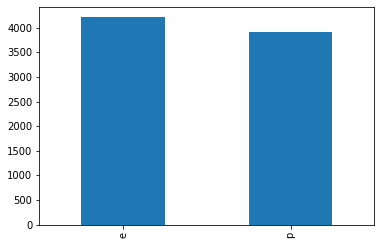

In [10]:
# Count the no.of data points for each class label
pd.Series(data['class']).value_counts().plot(kind='bar');

In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Preprocess data

In [12]:
# Encoding the categorical features into numeric values
# Encode target labels with value between 0 and n_classes-1.
le = pp.LabelEncoder()
columns = data.columns
for c in columns:
    data[c] = le.fit_transform(data[c])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


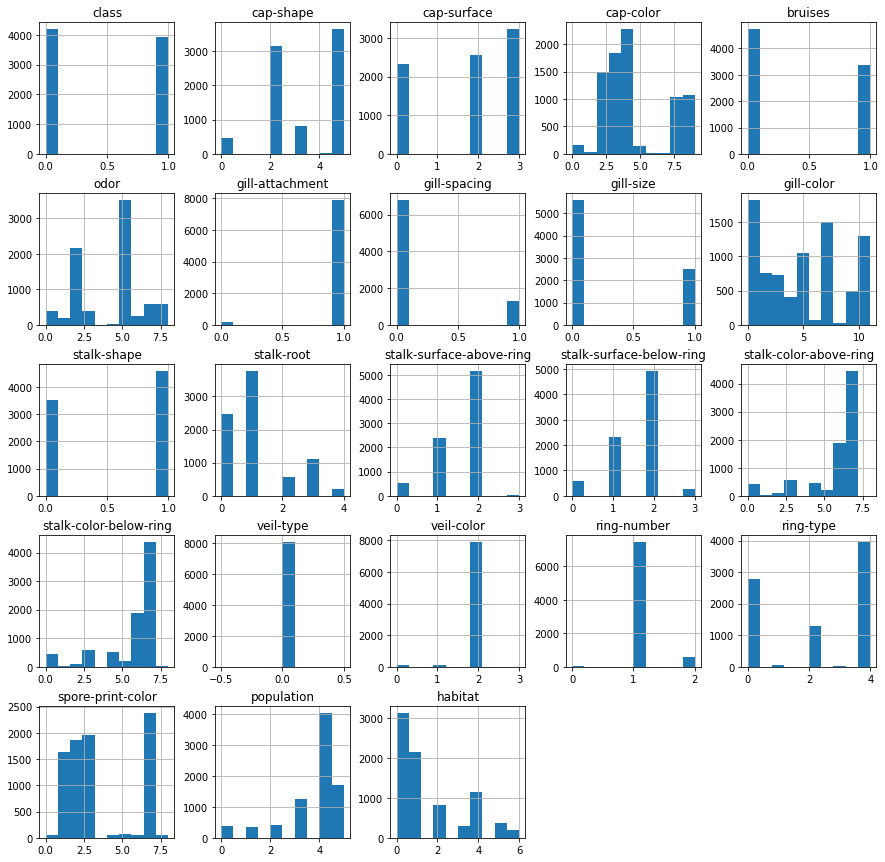

In [13]:
# Display histograms from the DataFrame's columns.
fig = plt.figure(figsize=(15, 15))
data.hist(ax=fig.gca())
plt.show()

In [14]:
# Seperate features and target labels
y = data["class"].values
X_all = data.drop(["class"], axis=1).values
X_all.shape, y.shape

((8124, 22), (8124,))

In [15]:
# Scale the given features bewtween the range 0 and 1
scaler = pp.MinMaxScaler()
X_scaled = scaler.fit_transform(X_all)

In [16]:
# Feature selection according to the k highest scores.
feature_select = fs.SelectKBest(fs.chi2, k=20)
X = feature_select.fit_transform(X_scaled, y)
X.shape

(8124, 20)

In [17]:
# Print features
X

array([[1.        , 0.66666667, 1.        , ..., 0.25      , 0.6       ,
        0.83333333],
       [1.        , 0.66666667, 1.        , ..., 0.375     , 0.4       ,
        0.16666667],
       [0.        , 0.66666667, 1.        , ..., 0.375     , 0.4       ,
        0.5       ],
       ...,
       [0.4       , 0.66666667, 0.        , ..., 0.        , 0.2       ,
        0.33333333],
       [0.6       , 1.        , 0.        , ..., 0.875     , 0.8       ,
        0.33333333],
       [1.        , 0.66666667, 0.        , ..., 0.5       , 0.2       ,
        0.33333333]])

In [18]:
# Split dataset into random train and test sub-datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.25
)

In [19]:
# Print dataset feature dimensions
X_train.shape, X_test.shape

((6093, 20), (2031, 20))

In [20]:
# Print dataset target label dimensions
y_train.shape, y_test.shape

((6093,), (2031,))

## Gaussian Naive Bayes

In [21]:
# Gaussian Naive Bayes (GNB) classification algorithm
gnb = nb.GaussianNB()
# Train the GNB model on the training data
gnb.fit(X, y)

GaussianNB()

Gaussian Naive Bayes Accuracy: 
92.32

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1040
           1       0.91      0.93      0.92       991

    accuracy                           0.92      2031
   macro avg       0.92      0.92      0.92      2031
weighted avg       0.92      0.92      0.92      2031

Confusion Matrix:


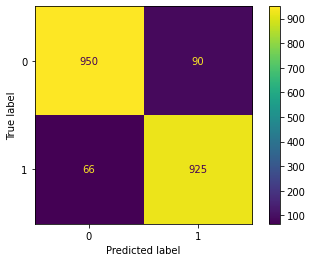

In [22]:
# Predict and evaluate the GNB model on the test data
pred_gnb = gnb.predict(X_test)

acc_gnb = round(accuracy_score(y_test, pred_gnb) * 100, 2)
print(f"Gaussian Naive Bayes Accuracy: \n{acc_gnb}\n")

cr_gnb = classification_report(y_test, pred_gnb)
print(f"Classification Report: \n{cr_gnb}")
cr_gnb = classification_report(y_test, pred_gnb, output_dict=True)

print("Confusion Matrix:")
cm_gnb = confusion_matrix(y_test, pred_gnb)
disp_gnb = ConfusionMatrixDisplay(
    confusion_matrix=cm_gnb, display_labels=gnb.classes_
)
disp_gnb.plot()
plt.show()

## Logistic Regression

In [23]:
# Logistic Regression (LR) classification algorithm
lr = lm.LogisticRegression(solver='lbfgs', max_iter=500)
# Train the GNB model on the training data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Logistic Regression Accuracy: 
95.08

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

Confusion Matrix:


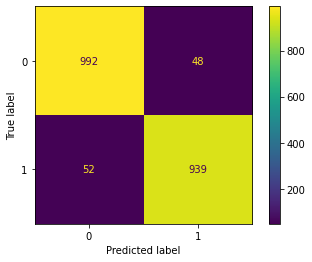

In [24]:
# Predict and evaluate the GNB model on the test data
pred_lr = lr.predict(X_test)

acc_lr = round(accuracy_score(y_test, pred_lr) * 100, 2)
print(f"Logistic Regression Accuracy: \n{acc_lr}\n")

cr_lr = classification_report(y_test, pred_lr)
print(f"Classification Report: \n{cr_lr}")
cr_lr = classification_report(y_test, pred_lr, output_dict=True)

print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, pred_lr)
disp_lr = ConfusionMatrixDisplay(
    confusion_matrix=cm_lr, display_labels=lr.classes_
)
disp_lr.plot()
plt.show()

## Support Vector Classification

In [25]:
# Support Vector Classification (SVC) algorithm.
svc = svm.SVC(kernel='linear')
# Train the GNB model on the training data
svc.fit(X_train, y_train)

SVC(kernel='linear')

SVC Accuracy: 
95.13
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

Confusion Matrix:


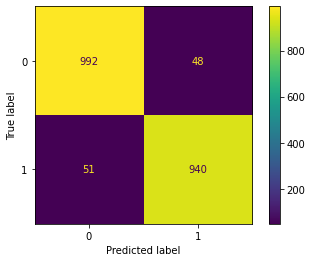

In [26]:
# Predict and evaluate the GNB model on the test data
pred_svc = svc.predict(X_test)

acc_svc = round(accuracy_score(y_test, pred_svc) * 100, 2)
print(f"SVC Accuracy: \n{acc_svc}")

cr_svc = classification_report(y_test, pred_svc)
print(f"Classification Report: \n{cr_svc}")
cr_svc = classification_report(y_test, pred_svc, output_dict=True)

print("Confusion Matrix:")
cm_svc = confusion_matrix(y_test, pred_svc)
disp_svc = ConfusionMatrixDisplay(
    confusion_matrix=cm_svc, display_labels=lr.classes_
)
disp_svc.plot()
plt.show()

## Random Forest

In [27]:
# Random Forest (RF) classification algorithm
rf = ens.RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
# Train the GNB model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

Random Forest Classifier Accuracy: 
99.11
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1040
           1       1.00      0.98      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

Confusion Matrix:


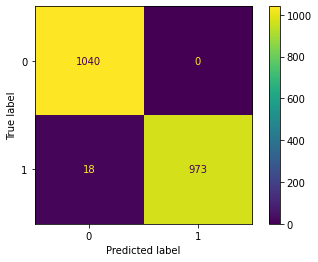

In [28]:
# Predict and evaluate the GNB model on the test data
pred_rf = rf.predict(X_test)

acc_rf = round(accuracy_score(y_test, pred_rf) * 100, 2)
print(f"Random Forest Classifier Accuracy: \n{acc_rf}")

cr_rf = classification_report(y_test, pred_rf)
print(f"Classification Report: \n{cr_rf}")
cr_rf = classification_report(y_test, pred_rf, output_dict=True)

print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, pred_rf)
disp_rf = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf, display_labels=lr.classes_
)
disp_rf.plot()
plt.show()

## Artificial Neural Network

In [29]:
# Constructing an Artificial Neural Network (ANN) with High-Level Keras API in Tensorflow
model = tf.keras.models.Sequential()

# Layer 01
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.15))

# Layer 02
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.15))

# Layer 03
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.15))

# Layer 04
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

# Optimizers
opt = tf.keras.optimizers.SGD()

# Loss Function
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                5

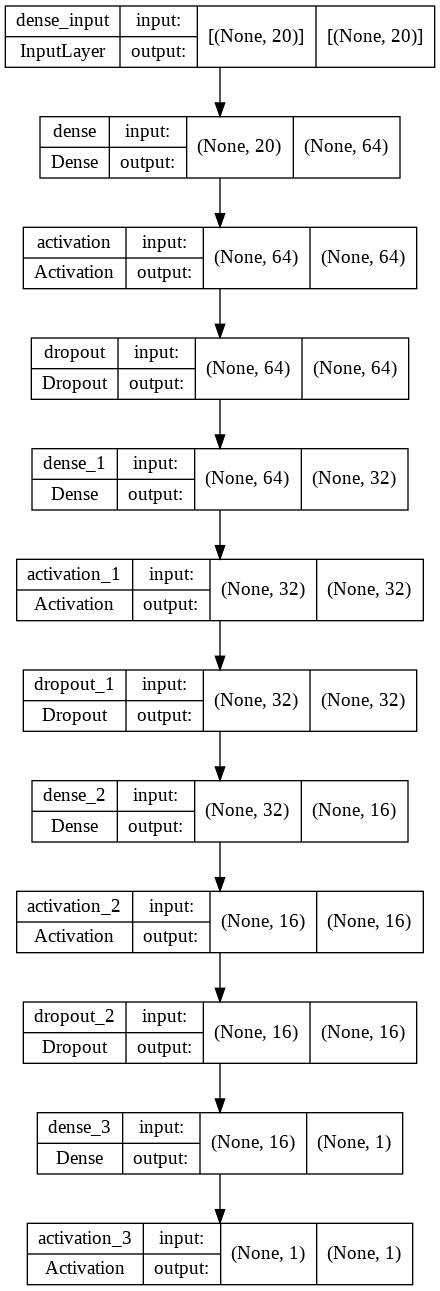

In [30]:
# visualize keras model
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
# number of training passes
epoch = 100

# Stop training when a val_loss metric stops improving.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

# Reduce learning rate when val_loss stops improving.
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, mode='auto'
)

# Configures and start the model for training.
history = model.fit(
    X_train,
    y_train,
    epochs=epoch,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
191/191 [==============================] - 4s 12ms/step - loss: 0.6417 - accuracy: 0.6389 - val_loss: 0.5950 - val_accuracy: 0.7947 - lr: 0.0100
Epoch 2/100
191/191 [==============================] - 2s 8ms/step - loss: 0.5585 - accuracy: 0.7840 - val_loss: 0.4886 - val_accuracy: 0.8740 - lr: 0.0100
Epoch 3/100
191/191 [==============================] - 2s 10ms/step - loss: 0.4607 - accuracy: 0.8456 - val_loss: 0.3762 - val_accuracy: 0.8907 - lr: 0.0100
Epoch 4/100
191/191 [==============================] - 1s 7ms/step - loss: 0.3723 - accuracy: 0.8836 - val_loss: 0.2982 - val_accuracy: 0.9212 - lr: 0.0100
Epoch 5/100
191/191 [==============================] - 2s 9ms/step - loss: 0.3252 - accuracy: 0.8978 - val_loss: 0.2563 - val_accuracy: 0.9276 - lr: 0.0100
Epoch 6/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2941 - accuracy: 0.9127 - val_loss: 0.2271 - val_accuracy: 0.9325 - lr: 0.0100
Epoch 7/100
191/191 [==============================] - 1s 8ms/

In [32]:
# Training metrics of the model
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

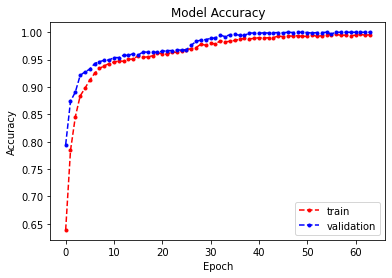

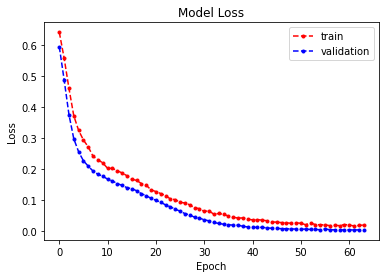

In [33]:
# Make sure the model is not overfitting or underfitting.

# summarize history for accuracy
plt.plot(history.history['accuracy'], marker='.',
         linestyle='dashed', color='red'
         )
plt.plot(history.history['val_accuracy'], marker='.',
         linestyle='dashed', color='blue'
         )
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

print()

# summarize history for loss
plt.plot(history.history['loss'], marker='.', linestyle='dashed', color='red')
plt.plot(history.history['val_loss'], marker='.',
         linestyle='dashed', color='blue'
         )
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [34]:
# evaluate the trained model with test data
test_loss, test_acc = model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000


In [35]:
# print test-loss and test-accuracy
test_loss, test_acc * 100

(0.0043965610675513744, 100.0)

In [36]:
# predict for all the testing samples
pred = model.predict(X_test) > 0.5

Logistic Regression Accuracy: 
100.0

Test loss: 
0.0044

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Confusion Matrix:


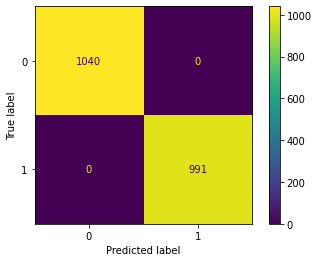

In [37]:
# Predict and evaluate the ANN model on the test data
acc_ann = round(test_acc * 100, 2)
print(f"Logistic Regression Accuracy: \n{acc_ann}\n")

loss_ann = round(test_loss, 4)
print(f"Test loss: \n{loss_ann}\n")

cr_ann = classification_report(y_test, pred)
print(f"Classification Report: \n{cr_ann}")
cr_ann = classification_report(y_test, pred, output_dict=True)

print("Confusion Matrix:")
cm_ann = confusion_matrix(y_test, pred)
disp_ann = ConfusionMatrixDisplay(
    confusion_matrix=cm_ann, display_labels=lr.classes_
)
disp_ann.plot()
plt.show()

## Summary Report

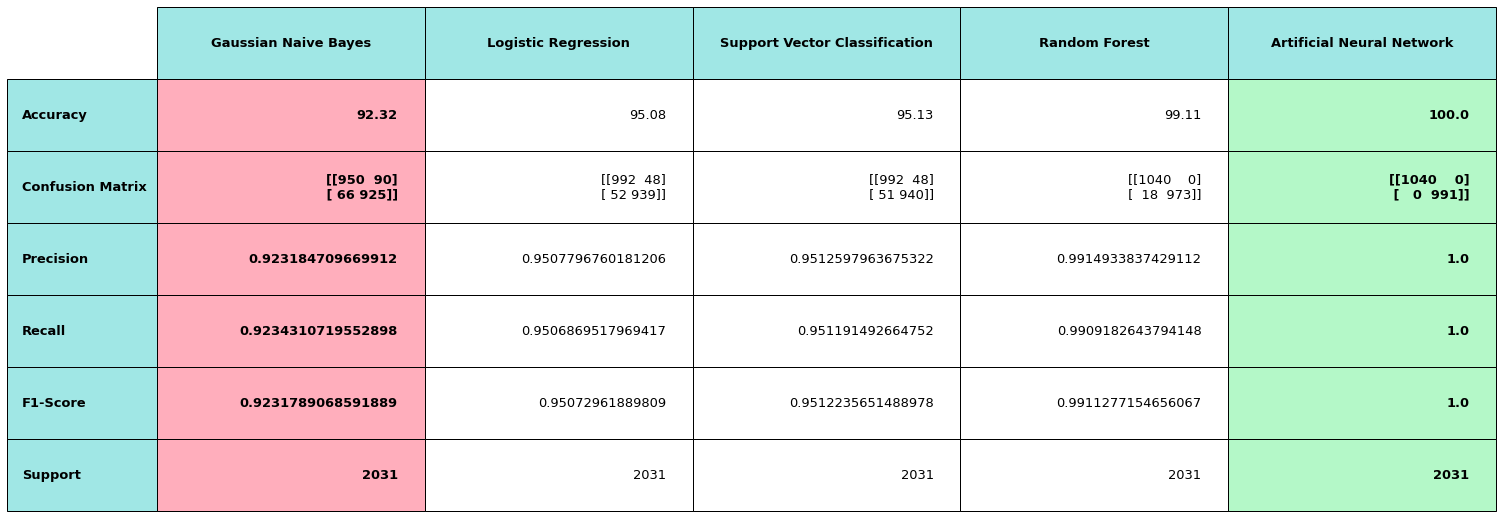

In [38]:
fig, ax = plt.subplots(1, 1)
ax.axis('tight')
ax.axis('off')

# Table column names
column_names = (
    'Gaussian Naive Bayes', 'Logistic Regression', 'Support Vector Classification', 'Random Forest', 'Artificial Neural Network'
)

# Table row names
index_name = (
    'Accuracy', 'Confusion Matrix', 'Precision', 'Recall', 'F1-Score', 'Support'
)

# Table data
metrics = np.array([
    [acc_gnb, acc_lr, acc_svc, acc_rf, acc_ann],
    [str(cm_gnb), str(cm_lr), str(cm_svc), str(cm_rf), str(cm_ann)],
    [
        cr_gnb['macro avg']['precision'], cr_lr['macro avg']['precision'],
        cr_svc['macro avg']['precision'], cr_rf['macro avg']['precision'], cr_ann['macro avg']['precision']
    ],
    [
        cr_gnb['macro avg']['recall'], cr_lr['macro avg']['recall'],
        cr_svc['macro avg']['recall'], cr_rf['macro avg']['recall'], cr_ann['macro avg']['recall']
    ],
    [
        cr_gnb['macro avg']['f1-score'], cr_lr['macro avg']['f1-score'],
        cr_svc['macro avg']['f1-score'], cr_rf['macro avg']['f1-score'], cr_ann['macro avg']['f1-score']
    ],
    [
        cr_gnb['macro avg']['support'], cr_lr['macro avg']['support'],
        cr_svc['macro avg']['support'], cr_rf['macro avg']['support'], cr_ann['macro avg']['support']
    ]
])

# Plot table
summary_table = ax.table(
    cellText=metrics,
    colLabels=column_names,
    rowLabels=index_name,
    rowColours=["#A0E7E5"] * len(index_name),
    colColours=["#A0E7E5"] * len(column_names),
    loc="center"
)

# Set text bold for column and row header and column 4 (ANN)
for (r, c), cell in summary_table.get_celld().items():
    if r == 0 or c == -1:
        cell.set_text_props(fontproperties=fm.FontProperties(weight='bold'))

    # Gaussian NB
    if r != 0 and c == 0:
        cell.set_text_props(fontproperties=fm.FontProperties(weight='bold'))
        summary_table[(r, c)].set_facecolor("#FFAEBC")

    # ANN Column
    if r != 0 and c == 4:
        cell.set_text_props(fontproperties=fm.FontProperties(weight='bold'))
        summary_table[(r, c)].set_facecolor("#B4F8C8")

# Set font and table size
summary_table.set_fontsize(28)
summary_table.scale(4, 6)
plt.show()